# <FONT COLOR="red">***NEURAL NETWORK DENSE APPLY IN MNIST***</FONT>
---
---
For this activity we are going to work with the MNIST dataset.

Official documentation can be found at: https://yann.lecun.com/exdb/mnist/

The Modified National Institute of Standards and Technology (MNIST) dataset is a set of images containing handwritten digits, widely used as a benchmark in the field of computer vision and machine learning. It was created from two larger datasets collected by the US National Institute of Standards and Technology.

The MNIST dataset consists of a total of 70,000 grayscale images of 28x28 pixels. These images are divided into two sets: a training set, containing 60,000 images, and a test set, containing 10,000 images. Each image represents a single digit from 0 to 9.

In [11]:
# IMPORT MODEL
import keras

# IMPORT COMMON LIBRARIES
import numpy as np
import pandas as pd

# IMPORT GRAPH LIBRAIRES
import matplotlib.pyplot as plt

In [2]:
# LOAD DATASET
mnist = keras.datasets.mnist

# LOAD TRAIN AND TEST SETS OF MNIST
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Label: 0
Image:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

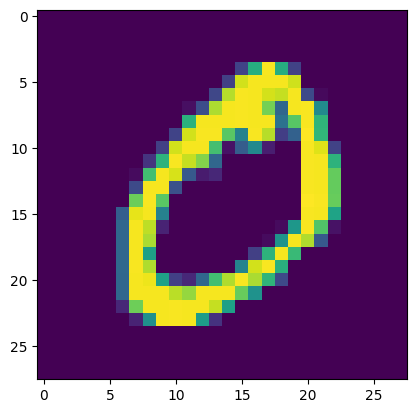

In [4]:
index = 1
# DISPLAY TAG AND IMAGE
np.set_printoptions(linewidth=320)
print(f'Label: {training_labels[index]}')
print(f'Image:\n{training_images[index]}')

# DISPLAY IMAGE
plt.imshow(training_images[index])

In [5]:
# NORMALIZE PIXEL VALUES
training_images = training_images / 255.0
test_images = test_images / 255.0

In [6]:
# CREATE CLASSIFICATION MODEL
model = keras.models.Sequential([
  keras.layers.Flatten(
    input_shape=(28,28)
  ),
  keras.layers.Dense(
    128,
    activation='relu'
  ),
  keras.layers.Dense(
    10,
    activation='softmax'
  )
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# COMPILE MODEL
model.compile(
  optimizer='adam',
  loss='crossentropy',
  metrics=['accuracy']
)

In [9]:
# TRAIN MODEL
history = model.fit(
  training_images,
  training_labels,
  epochs=10
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8791 - loss: 0.4341
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9648 - loss: 0.1226
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9768 - loss: 0.0786
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9816 - loss: 0.0586
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9875 - loss: 0.0412
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9903 - loss: 0.0331
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9918 - loss: 0.0265
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9944 - loss: 0.0195
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9952 - loss: 0.0165
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9958 - loss: 0.0141


<Axes: >

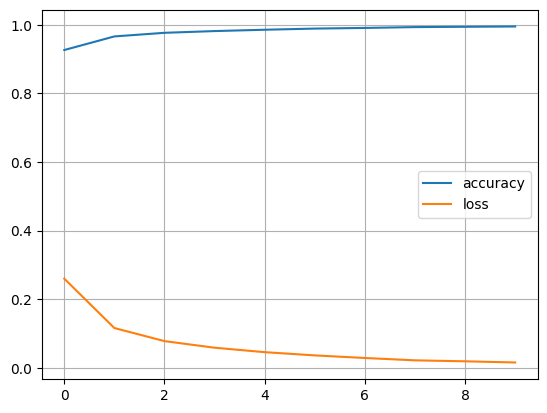

In [12]:
# GRAPH THE TRAIN HISTORY
pd.DataFrame(history.history).plot(grid=True)

In [14]:
# EVALUATE MODEL WITH TRAIN SET
loss, accuracy = model.evaluate(training_images, training_labels)
print('Evaluate model with train set')
print(f'Loss Train:     {loss}')
print(f'Accuracy Train: {accuracy}')

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9951 - loss: 0.0154
Evaluate model with train set
Loss Train:     0.01465325802564621
Accuracy Train: 0.9954500198364258


In [15]:
# EVALUATE MODEL WITH NEW DATA
loss, accuracy = model.evaluate(test_images, test_labels)
print('Evaluate model with test set')
print(f'Loss Test:     {loss}')
print(f'Accuracy Test: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9746 - loss: 0.0930
Evaluate model with test set
Loss Test:     0.08071458339691162
Accuracy Test: 0.9775000214576721
